# Part I: Decission Trees
Phabel Antonio López Delgado

In [ ]:
# Plot as Plotly Heatmap
def plot_tree_heatmap(model, X, y):

    import plotly.graph_objects as go

    feature_names = list(X.columns)
    labels = [''] * model.tree_.node_count
    parents = [''] * model.tree_.node_count
    labels[0] = 'root'

    for i, (f, t, l, r) in enumerate(zip(
        model.tree_.feature,
        model.tree_.threshold,
        model.tree_.children_left,
        model.tree_.children_right
        )):
        if l != r:
            labels[l] = f'{feature_names[f]} <= {t:g}'
            labels[r] = f'{feature_names[f]} > {t:g}'
            parents[l] = parents[r] = labels[i]

    fig = go.Figure(go.Treemap(
        branchvalues='total',
        labels=labels,
        parents=parents,
        values=model.tree_.n_node_samples,
        textinfo='label+value+percent root',
        marker=dict(colors=model.tree_.impurity),
        customdata=list(map(str, model.tree_.value)),
        hovertemplate='''
        <b>%{label}</b><br>
        impurity: %{color}<br>
        samples: %{value} (%{percentRoot:%.2f})<br>
        value: %{customdata}'''
        ))
    fig.show()

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Load Data
tabla = pd.read_csv("https://gitlab.com/dgtic5/res//raw/main/aprendizajeSupervizado/column_3C_weka.csv")
X = tabla.drop("class", axis=1)
y = tabla["class"]

## Vanilla Decission Tree

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2)

In [ ]:
# Model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

                   precision    recall  f1-score   support

           Hernia       0.44      0.40      0.42        10
           Normal       0.64      0.50      0.56        18
Spondylolisthesis       0.85      0.97      0.90        34

         accuracy                           0.74        62
        macro avg       0.64      0.62      0.63        62
     weighted avg       0.72      0.74      0.73        62



### Plotting

#### plot_tree

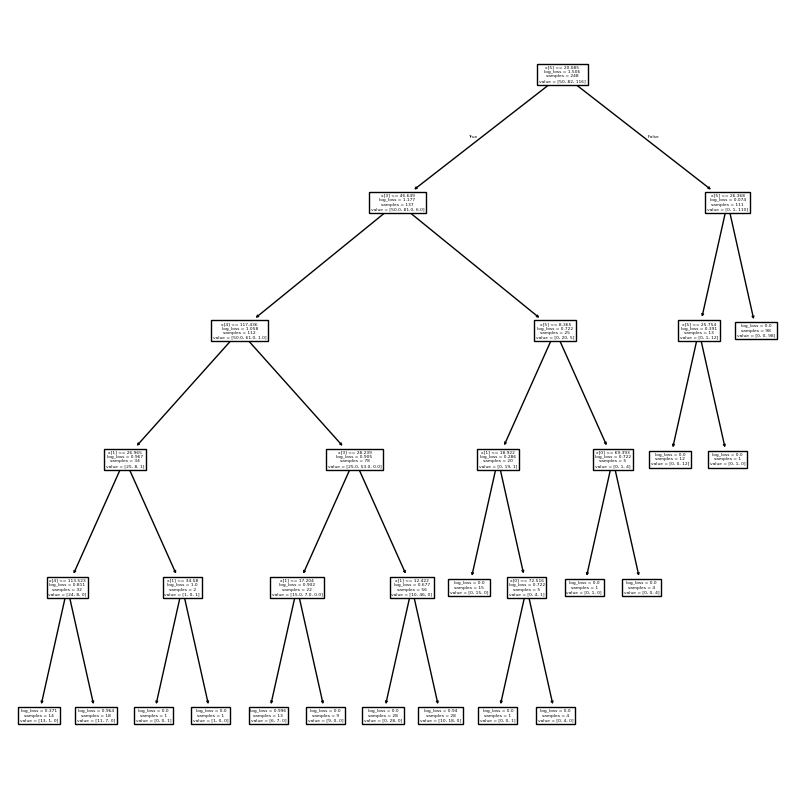

In [ ]:
# Plot Tree
plt.figure(figsize=(10, 10))
plot_tree(model)
plt.show()

#### Plotly Heatmap

In [ ]:
# Plotly Heatmap
plot_tree_heatmap(model=model, X=X_train, y=y_train)

#### Super Tree

In [ ]:
# Super Tree Install
!pip install supertree

In [ ]:
# Super Tree
from supertree import SuperTree

# Initialize supertree
super_tree = SuperTree(model, X_train, y_train, X.columns.tolist(), y.unique().tolist())

# show tree in your notebook
super_tree.show_tree()

#### Extra: DTreeViz

In [ ]:
!pip install dtreeviz

In [ ]:
# Import Libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import dtreeviz

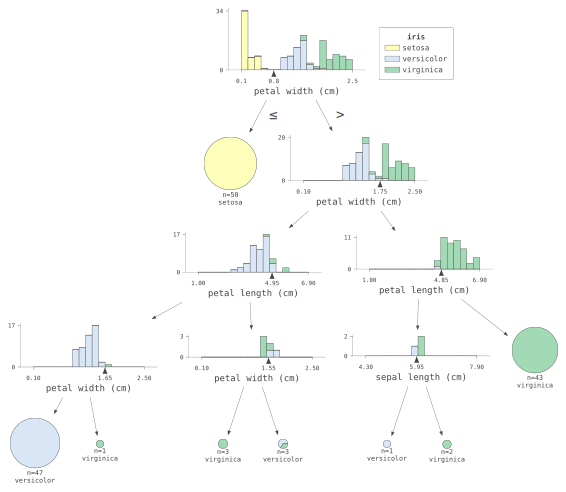

In [ ]:
# Load Data
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# ClassificationTree Object
clf = DecisionTreeClassifier(max_depth=4)

# Fit
clf.fit(X_iris, y_iris)

# DTreeViz Object
viz_model = dtreeviz.model(clf,
                           X_train=X_iris,
                           y_train=y_iris,
                           feature_names=iris.feature_names,
                           target_name='iris',
                           class_names=iris.target_names)

# Plot inline SVG
viz_model.view(fontname="monospace")

## Grid Search DecissionTree

In [ ]:
# Model
model = DecisionTreeClassifier(max_depth=3)

In [ ]:
# Grid Search Parameters
DT_parameters_grid = [
    {'min_samples_split': [2, 4, 6, 8, 10],
     'criterion': ["gini", "entropy", "log_loss"]},
    {'max_depth': [2, 3, 4, 5, 6],
     'criterion': ["gini", "entropy", "log_loss"]},
    ]

In [ ]:
# Cross Validation Hiperparametrization
DT_CV = GridSearchCV(model,DT_parameters_grid,cv=5,scoring="accuracy")
DT_CV.fit(X_train,y_train)
DT_CV.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [ ]:
# Check best result
best_model = DT_CV.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test,y_pred))

                   precision    recall  f1-score   support

           Hernia       0.83      1.00      0.91        10
           Normal       0.88      0.78      0.82        18
Spondylolisthesis       0.94      0.94      0.94        34

         accuracy                           0.90        62
        macro avg       0.88      0.91      0.89        62
     weighted avg       0.90      0.90      0.90        62



### Plotting

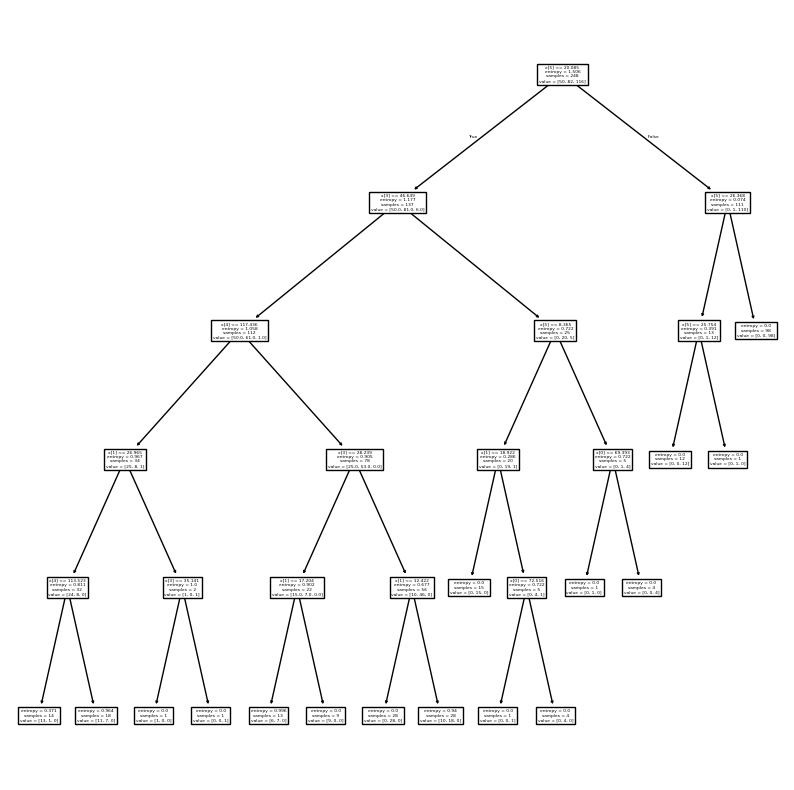

In [ ]:
# plot_tree
plt.figure(figsize=(10, 10))
plot_tree(best_model)
plt.show()

In [ ]:
# Plotly Heatmap
plot_tree_heatmap(model=best_model, X=X_train, y=y_train)

In [ ]:
# Super Tree
from supertree import SuperTree
super_tree = SuperTree(best_model, X_train, y_train, X.columns.tolist(), y.unique().tolist())
super_tree.show_tree()

## Gradient Boosting Tree

### Vanilla GBT

In [ ]:
# Libraries
from sklearn.ensemble import GradientBoostingClassifier

# Load Data
tabla = pd.read_csv("https://gitlab.com/dgtic5/res//raw/main/aprendizajeSupervizado/column_3C_weka.csv")
X = tabla.drop("class", axis=1)
y = tabla["class"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2)

# Model
gbc = GradientBoostingClassifier(n_estimators=10)

# Fit
gbc.fit(X_train, y_train)

# Predict
y_pred = gbc.predict(X_test)

# Report
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

           Hernia       0.67      0.40      0.50        10
           Normal       0.68      0.72      0.70        18
Spondylolisthesis       0.92      1.00      0.96        34

         accuracy                           0.82        62
        macro avg       0.76      0.71      0.72        62
     weighted avg       0.81      0.82      0.81        62



#### Grid Search Gradient Boosting Classifier

In [ ]:
# Data URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat"
column_names = [
 "age", "sex", "chest_pain", "resting_bp",
"cholesterol", "fasting_bs", "rest_ecg",
 "max_heart_rate", "exercise_angina", "oldpeak",
"slope", "num_vessels", "thal", "target"]

# Load Data
tabla = pd.read_csv(url, sep=" ", names=column_names)
X = tabla.drop("target", axis=1)
y = tabla["target"]

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2)

In [ ]:
# Model Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=10)

In [ ]:
# CV parameters
GBC_parameters_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['friedman_mse', 'squared_error']
}

In [ ]:
# CV hiperparametrization
GBC_CV = GridSearchCV(gbc, GBC_parameters_grid, cv=10, scoring="accuracy")

# Fit
GBC_CV.fit(X_train, y_train)

# Check Best Parameters
GBC_CV.best_params_

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1620 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [ ]:
# Get Best Model
best_model = GBC_CV.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Report
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

           Hernia       0.75      0.60      0.67        10
           Normal       0.81      0.72      0.76        18
Spondylolisthesis       0.89      1.00      0.94        34

         accuracy                           0.85        62
        macro avg       0.82      0.77      0.79        62
     weighted avg       0.85      0.85      0.85        62



Los DecissionTrees mostraron ser un modelo muy intuitivo y de fácil interpretación. Hubo una mejora considerable cuando se incorporó la Cross-Validation y se aplicó el GradientBoostingClassifier-Tree, obteniendo métricas mucho mejores que la versión vanilla sin optimizatión de hiperparámetros.

# Part II: Random Forest
Phabel Antonio López Delgado

## Random Forest: Bagging Ensemble

In [ ]:
# Libraries
from sklearn.ensemble import RandomForestClassifier

# Load Data
tabla = pd.read_csv("https://gitlab.com/dgtic5/res//raw/main/aprendizajeSupervizado/column_3C_weka.csv")
X = tabla.drop("class", axis=1)
y = tabla["class"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Model
forest = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_features=0.8)

# Fit
forest.fit(X_train, y_train)

# Predict
y_pred = forest.predict(X_test)

# Report
print(classification_report(y_test,y_pred))

                   precision    recall  f1-score   support

           Hernia       0.73      0.80      0.76        10
           Normal       0.81      0.72      0.76        18
Spondylolisthesis       0.94      0.97      0.96        34

         accuracy                           0.87        62
        macro avg       0.83      0.83      0.83        62
     weighted avg       0.87      0.87      0.87        62



### Grid Search Random Forest

In [ ]:
# Data URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat"
column_names = [
 "age", "sex", "chest_pain", "resting_bp",
"cholesterol", "fasting_bs", "rest_ecg",
 "max_heart_rate", "exercise_angina", "oldpeak",
"slope", "num_vessels", "thal", "target"]

# Load Data
tabla = pd.read_csv(url, sep=" ", names=column_names)
X = tabla.drop("target", axis=1)
y = tabla["target"]

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2)

In [ ]:
# Model
forest = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_features=0.8)

In [ ]:
# Grid-Search Parametrization
RF_parameters_grid = {
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Cross Validation
RF_CV = GridSearchCV(forest, RF_parameters_grid, cv=10, scoring="accuracy")

# Fit Model
RF_CV.fit(X_train,y_train)

# Check Best parameters
RF_CV.best_params_

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
# Get Best Model
best_model = RF_CV.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Predict
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.78      0.81        32
           2       0.71      0.77      0.74        22

    accuracy                           0.78        54
   macro avg       0.77      0.78      0.77        54
weighted avg       0.78      0.78      0.78        54



#### Explore Random Forest Ensemble

In [ ]:
# Number of Trees
len(best_model.estimators_)

100

In [ ]:
# Features Importance
best_model.feature_importances_

array([0.05289629, 0.02585427, 0.24670365, 0.02768435, 0.03386335,
       0.00228971, 0.00270791, 0.10017845, 0.06509438, 0.07123506,
       0.0529541 , 0.14767333, 0.17086516])

[0.05314823 0.09243492 0.33342755 0.         0.         0.
 0.         0.         0.         0.08130849 0.         0.43968081
 0.        ]


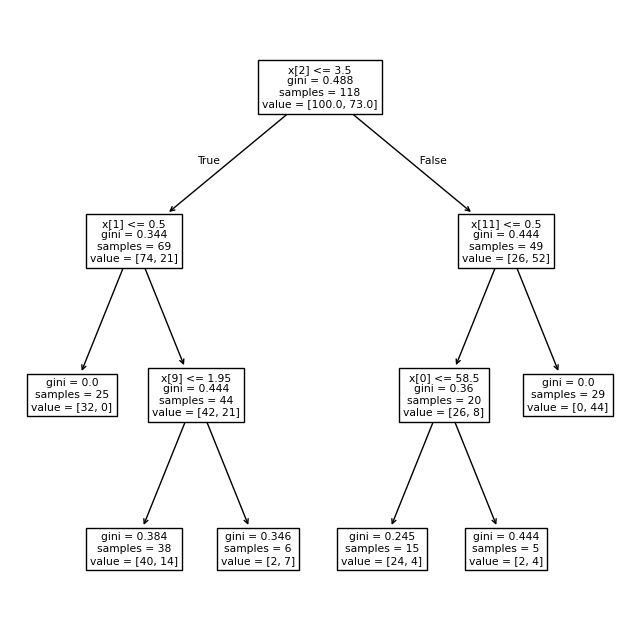

In [ ]:
# Plot Tree 0
print(best_model.estimators_[0].feature_importances_)
plt.figure(figsize=(8, 8))
plot_tree(best_model.estimators_[0])
plt.show()
plot_tree_heatmap(model=best_model.estimators_[0], X=X_train, y=y_train)
super_tree = SuperTree(best_model.estimators_[0], X_train, y_train, X.columns.tolist(), list(map(str, y.unique())))
super_tree.show_tree()

[0.         0.00130333 0.07836251 0.         0.11174778 0.
 0.         0.2943925  0.         0.1248451  0.         0.04813618
 0.34121261]


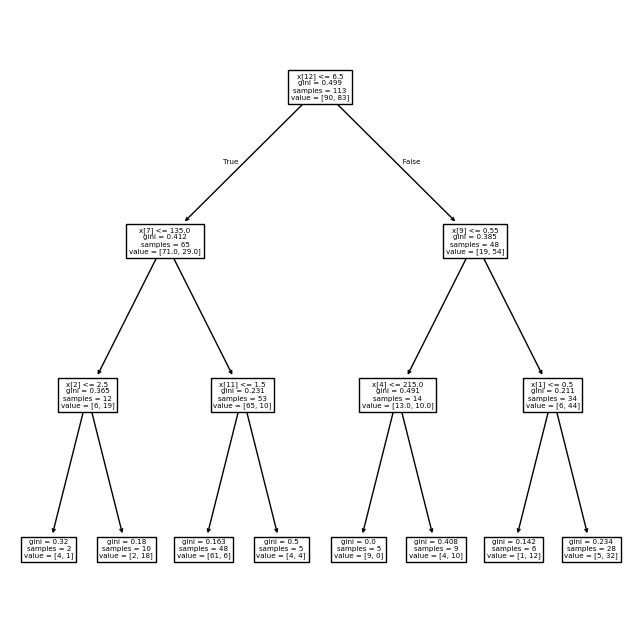

In [ ]:
# Plot Tree 1
print(best_model.estimators_[1].feature_importances_)
plt.figure(figsize=(8, 8))
plot_tree(best_model.estimators_[1])
plt.show()
plot_tree_heatmap(model=best_model.estimators_[1], X=X_train, y=y_train)
super_tree = SuperTree(best_model.estimators_[1], X_train, y_train, X.columns.tolist(), list(map(str, y.unique())))
super_tree.show_tree()

Al final, el ensamble de Gradient Boosting tuvo métricas ligeramente superiores que el Random Forest mediante el Bagging the DecissionTrees. Pero el RandomForest optimizado mediante Cross-Validation tuvo mejores resultados que la versión sin optimización. Los modelos fueron más eficientes cuando se les aplicaba algún método de ensamble, a pesar de que tu tiempo de entrenamiento aumentaba considerablemte. Pero también se debe tener en cuenta que se usó Cross-Validation mediante GridSearch, el método más tardado que optimiza mediante muchas combinaciones; posiblemente otro método como el RandomSearch podría ser más rápido y mantener buenas métricas. Las diferentes visualizaciones interactivas mediante plotly y SuperTree permiten entender mejor el proceso mediante el cual las diferentes distribuciones son purificadas para maximizar diferencias entre cada variable y rama de los árboles.